In [ ]:
cd ATML-PA-2/

/kaggle/working/ATML-PA-2/IRM


In [21]:
import importlib
import torch
import utils
import architecture
import train
import types
importlib.reload(utils)
importlib.reload(architecture)
importlib.reload(train)


from utils.dataset import FeatureTensorDataset, OfficeHomeDataset, _truncate_resnet_from
from torchvision.models import ResNet50_Weights 
from importlib import reload
import train
from train import train_workflow
import types
from utils.tsne import tsne_plot, get_features
from utils.evaluation import evaluate_ds
import matplotlib.pyplot as plt
import os
from architecture import resnet_classifier
import torch

SyntaxError: invalid syntax. Perhaps you forgot a comma? (train.py, line 116)

In [4]:
root_dir = "../datasets/OfficeHomeDataset"
csv_file = f"{root_dir}/ImageInfo.csv"

transform = ResNet50_Weights.IMAGENET1K_V1.transforms()
classes = os.listdir(f"{root_dir}/Art")

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
def make_cache(domains, layer_name):
    model = resnet_classifier(len(classes))
    if len(domains)>1:
        caches = []
        for domain in domains:
            ds = OfficeHomeDataset(root_dir, csv_file, [domain], transform)
            caches.append(FeatureTensorDataset(ds, model, layer_name, device=device, batch_size=64))
        return caches
    else:
        ds = OfficeHomeDataset(root_dir, csv_file, domains, transform)
        return FeatureTensorDataset(ds, model, layer_name, device=device, batch_size=64)


In [11]:
def analysis(sources, target, config, caches_source=None, cache_target=None):
    
    if caches_source is None:
        caches_source = make_cache(sources, 'layer3')
        

    if cache_target is None:
        cache_target = make_cache(target, 'layer3')

    model = resnet_classifier(num_classes=len(classes))
    truncated_model = _truncate_resnet_from(model, 'layer3')

    def _forward_impl(self, x):
        f4 = self.layer4(x)
        x = torch.flatten(self.avgpool(f4), 1)
        x = self.fc(x)
        return x

    import types
    truncated_model.forward = types.MethodType(_forward_impl, truncated_model)

    print("Evaluating on target domain test set")
    
    
    train_workflow(truncated_model, caches_source, cache_target, config, device)
    evaluate_ds(cache_target, truncated_model, device, target[0], None)


In [8]:
sources = ["Art", "Real World", "Product"]
target = ["Clipart"]

caches_source = make_cache(sources, 'layer3')
cache_target = make_cache(target, 'layer3')

Precomputing up to layer3: 100%|██████████| 69/69 [00:46<00:00,  1.48it/s]


Evaluating on target domain test set


Training:   0%|          | 0/12 [00:00<?, ?it/s]


Epoch 1/12


Training:   8%|▊         | 1/12 [00:24<04:32, 24.74s/it]

	ERM loss: 11.938709	Grad penalty: 0.015282	Train Accuracy: 17.18	Test Accuracy: 6.85

Epoch 2/12


Training:  17%|█▋        | 2/12 [00:49<04:04, 24.49s/it]

	ERM loss: 11.089241	Grad penalty: 0.099436	Train Accuracy: 25.91	Test Accuracy: 13.86

Epoch 3/12


Training:  25%|██▌       | 3/12 [01:13<03:41, 24.56s/it]

	ERM loss: 10.399907	Grad penalty: 0.192782	Train Accuracy: 28.32	Test Accuracy: 15.69

Epoch 4/12


Training:  33%|███▎      | 4/12 [01:38<03:16, 24.58s/it]

	ERM loss: 9.829364	Grad penalty: 0.238170	Train Accuracy: 30.54	Test Accuracy: 17.48

Epoch 5/12


Training:  42%|████▏     | 5/12 [02:03<02:52, 24.70s/it]

	ERM loss: 9.253896	Grad penalty: 0.271369	Train Accuracy: 31.31	Test Accuracy: 18.28

Epoch 6/12


Training:  50%|█████     | 6/12 [02:28<02:28, 24.83s/it]

	ERM loss: 8.769016	Grad penalty: 0.278270	Train Accuracy: 32.87	Test Accuracy: 18.58

Epoch 7/12


Training:  58%|█████▊    | 7/12 [02:53<02:04, 24.82s/it]

	ERM loss: 8.262912	Grad penalty: 0.261376	Train Accuracy: 35.39	Test Accuracy: 19.31

Epoch 8/12


Training:  67%|██████▋   | 8/12 [03:18<01:39, 24.85s/it]

	ERM loss: 7.741431	Grad penalty: 0.255357	Train Accuracy: 38.36	Test Accuracy: 21.24

Epoch 9/12


Training:  75%|███████▌  | 9/12 [03:42<01:14, 24.87s/it]

	ERM loss: 7.352030	Grad penalty: 0.220212	Train Accuracy: 44.41	Test Accuracy: 24.79

Epoch 10/12


Training:  83%|████████▎ | 10/12 [04:07<00:49, 24.85s/it]

	ERM loss: 6.863207	Grad penalty: 0.242195	Train Accuracy: 46.82	Test Accuracy: 25.84

Epoch 11/12


Training:  92%|█████████▏| 11/12 [04:32<00:24, 24.87s/it]

	ERM loss: 6.422023	Grad penalty: 0.230389	Train Accuracy: 49.70	Test Accuracy: 27.45

Epoch 12/12


Training: 100%|██████████| 12/12 [04:57<00:00, 24.81s/it]

	ERM loss: 6.059851	Grad penalty: 0.210284	Train Accuracy: 53.78	Test Accuracy: 29.12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== Evaluation for Clipart Domain ===
Accuracy: 29.12%
Confusion Matrix:

Classification Report:
               precision    recall  f1-score   support

           0     0.2149    0.8667    0.3444        60
           1     0.4500    0.3214    0.3750        56
           2     0.3333    0.0156    0.0299        64
           3     0.4118    0.0714    0.1217        98
           4     0.9405    0.7980    0.8634        99
           5     0.3378    0.2525    0.2890        99
           6     0.2994    0.6438    0.4087        73
           7     0.3981    0.8913    0.5503        46
           8     0.2839    0.5641    0.3777        78
           9     0.5873    0.3737    0.4568        99
          10     0.1793    0.7879    0.2921        99
          11     0.0000    0.0000    0.0000        40
          12     0.3846    0.0505    0.0893        99
          13     0.5000    0.1094    0.1795        64
          14     0.3488    0.7143    0.4688        42
          15     0.0000    0.0000   

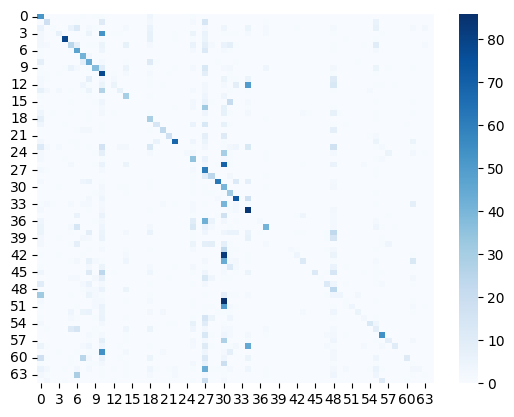

In [20]:
config = {'epochs':25, 
          'lr':1e-3, 
          'batch_size':128, 
          'weight_decay':1e-5, 
          'phi':1.0,
          'scheduling_constant':2.0,
          }
analysis(sources, target, config, caches_source, cache_target)

In [19]:
classes[5]

'Bucket'